<h1 style="text-align:center">Deep Learning   </h1>
<h1 style="text-align:center"> Lab Session 2 - 3 Hours </h1>
<h1 style="text-align:center"> Convolutional Neural Network (CNN) for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Sofiene Jerbi 
 
 
The aim of this session is to practice with Convolutional Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 


Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an pdf document using print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by May 29th 2017.

Send you pdf file to benoit.huet@eurecom.fr and olfa.ben-ahmed@eurecom.fr using **[DeepLearning_lab2]** as Subject of your email.

# Introduction

In the last Lab Session, you built a Multilayer Perceptron for recognizing hand-written digits from the MNIST data-set. The best achieved accuracy on testing data was about 97%.  Can  you do better than these results using a deep CNN ?
In this Lab Session, you will build, train and optimize in TensorFlow one of the early Convolutional Neural Networks:  **LeNet-5** to go to  more than 99% of accuracy. 






# Load MNIST Data in TensorFlow
Run the cell above to load the MNIST data that comes  with TensorFlow. You will use this data in **Section 1** and **Section 2**.

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Image Shape: (784,)
Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


# Section 1 : My First Model in TensorFlow

Before starting with CNN, let's train and test in TensorFlow the example :
**y=softmax(Wx+b)** seen in the DeepLearing course last week. 

This model reaches an accuracy of about 92 %.
You will also learn how to launch the tensorBoard https://www.tensorflow.org/get_started/summaries_and_tensorboard to  visualize the computation graph, statistics and learning curves. 

<b> Part 1 </b> : Read carefully the code in the cell below. Run it to perform training. 

In [2]:
from __future__ import print_function
import tensorflow as tf


#STEP 1

# Parameters
learning_rate = 0.01
training_epochs = 100
batch_size = 128
display_step = 1
logs_path = 'log_files/'  # useful for tensorboard

# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='Weights')
b = tf.Variable(tf.zeros([10]), name='Bias')

# Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()


#STEP 2 


# Launch the graph for training
with tf.Session() as sess:
    sess.run(init)
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    # Calculate accuracy
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))




Epoch:  01   =====> Loss= 1.286880516
Epoch:  02   =====> Loss= 0.731935138
Epoch:  03   =====> Loss= 0.600087293
Epoch:  04   =====> Loss= 0.536595575
Epoch:  05   =====> Loss= 0.497583865
Epoch:  06   =====> Loss= 0.471118211
Epoch:  07   =====> Loss= 0.451284961
Epoch:  08   =====> Loss= 0.435826128
Epoch:  09   =====> Loss= 0.423237018
Epoch:  10   =====> Loss= 0.413191887
Epoch:  11   =====> Loss= 0.404301464
Epoch:  12   =====> Loss= 0.396685983
Epoch:  13   =====> Loss= 0.390345196
Epoch:  14   =====> Loss= 0.384366291
Epoch:  15   =====> Loss= 0.379075426
Epoch:  16   =====> Loss= 0.374457767
Epoch:  17   =====> Loss= 0.370298153
Epoch:  18   =====> Loss= 0.366349395
Epoch:  19   =====> Loss= 0.363021322
Epoch:  20   =====> Loss= 0.359405888
Epoch:  21   =====> Loss= 0.356634224
Epoch:  22   =====> Loss= 0.353953617
Epoch:  23   =====> Loss= 0.351337360
Epoch:  24   =====> Loss= 0.348519755
Epoch:  25   =====> Loss= 0.346385461
Epoch:  26   =====> Loss= 0.344147922
Epoch:  27  

<b> Part 2  </b>: Using Tensorboard, we can  now visualize the created graph, giving you an overview of your architecture and how all of the major components  are connected. You can also see and analyse the learning curves. 

To launch tensorBoard: 
- Go to the **TP2** folder, 
- Open a Terminal and run the command line **"tensorboard --logdir=log_files/"**, it will generate an http link ,ex http://666.6.6.6:6006,
- Copy this  link into your web browser 


Enjoy It !! 


# Section 2 : The 99% MNIST Challenge !

<b> Part 1 </b> : LeNet5 implementation

One you are now familar with **tensorFlow** and **tensorBoard**, you are in this section to build, train and test the baseline [LeNet-5](http://yann.lecun.com/exdb/lenet/)  model for the MNIST digits recognition problem.  

In more advanced step you will make some optimizations to get more than 99% of accuracy. The best model can get to over 99.7% accuracy! 

For more information, have a look at this list of results : http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html


<img src="lenet.png",width="800" height="600" align="center">
<center><span>Figure 1: Lenet 5 </span></center>





The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

--------------------------
**Layer 1: Convolutional.** The output shape should be 28x28x6 **Activation.** sigmoid **Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16. **Activation.** sigmoid **Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.  You may need to use **flatten*  from tensorflow.contrib.layers import flatten

**Layer 3: Fully Connected.** This should have 120 outputs. **Activation.** sigmoid

**Layer 4: Fully Connected.** This should have 84 outputs. **Activation.** sigmoid

**Layer 5: Fully Connected.** This should have 10 outputs. **Activation.** softmax


<b> Question 2.1.1 </b>  Implement the Neural Network architecture described above.
For that, your will use classes and functions from  https://www.tensorflow.org/api_docs/python/tf/nn. 

We give you some helper functions for weigths and bias initilization. Also you can refer to section 1. 


In [2]:
import tensorflow as tf

#Helper functions  for weigths and bias initilization 
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial, name='Weights')

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial, name='Bias')

In [3]:
# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

In [14]:
from tensorflow.contrib.layers import flatten

def LeNet5_Model(data):
    data = tf.reshape(data, [-1, 28, 28, 1])
    # Set layer1 weights
    W_layer1 = weight_variable([5, 5, 1, 6])
    b_layer1 = bias_variable([6])
    
    # Set layer2 weights
    W_layer2 = weight_variable([5, 5, 6, 16])
    b_layer2 = bias_variable([16])
    
    # Set layer3 weights
    W_layer3 = weight_variable([400,120])
    b_layer3 = bias_variable([120])
    
    # Set layer4 weights
    W_layer4 = weight_variable([120,84])
    b_layer4 = bias_variable([84])
    
    # Set layer5 weights
    W_layer5 = weight_variable([84,10])
    b_layer5 = bias_variable([10])

    # Construct model
    layer1 = tf.nn.sigmoid(tf.nn.conv2d(data, W_layer1, [1, 1, 1, 1], padding='SAME') + b_layer1)
    pooling1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = tf.nn.sigmoid(tf.nn.conv2d(pooling1, W_layer2, [1, 1, 1, 1], padding='VALID') + b_layer2)
    pooling2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    flattened = tf.contrib.layers.flatten(pooling2)
    layer3 = tf.nn.sigmoid(tf.matmul(flattened, W_layer3) + b_layer3)
    layer4 = tf.nn.sigmoid(tf.matmul(layer3, W_layer4) + b_layer4)
    
    with tf.name_scope('Model'):
        # Model
        model = tf.nn.softmax(tf.matmul(layer4, W_layer5) + b_layer5) # Softmax
    return model

model = LeNet5_Model(x)

<b> Question 2.1.2. </b>  Calculate the number of parameters of this model 

<b>- For convolutional layers:</b><br>
    weights = filter_height \* filter_width \* input_channels \* output_channels<br>
    biases = output_channels<br>
<b>- For pooling:</b><br>
    pooling = 0 because no weights or biases<br>
<b>- For fully connected layers:</b><br>
    weights = input * output<br>
    biases = output<br>

<b>#layer1</b><br>
weights = 5 * 5 * 1 * 6 = 150<br>
biases = 6<br>
pooling = 0<br>

<b>#layer2</b><br>
weights = 5 * 5 * 6 * 16 = 900<br>
biases = 16<br>
pooling = 0<br>

<b>#layer3</b><br>
weights = 400 * 120 = 48 000<br>
biases = 120<br>

<b>#layer4</b><br>
weights = 120 * 84 = 10 080<br>
biases = 84<br>

<b>#layer5</b><br>
weights = 84 * 10 = 840<br>
biases = 10<br>

<b>Total number of parameters:</b> 60 206

<b> Question 2.1.3. </b>  Start the training with the parameters cited below:

     Learning rate =0.1
     Loss Fucntion : Cross entropy
     Optimisateur: SGD
     Number of training iterations= 10000
     The batch size =128

In [54]:
# Training parameters 
learning_rate = 0.1
training_epochs = 1000
batch_size = 128
display_step = 100
logs_path = 'log_files/'  # useful for tensorboard
saving_path = 'models/'
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(model), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

<b> Question 2.1.4. </b>  Implement the evaluation function for accuracy computation 

In [4]:
def evaluate(model, y):
    acc = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(acc, tf.float32))
    return accuracy

In [ ]:
with tf.name_scope('Accuracy'):
    # Accuracy
    accuracy = evaluate(model, y)

<b> Question 2.1.5. </b>  Implement training pipeline and run the training data through it to train the model.

- Before each epoch, shuffle the training set. 
- Print the loss per mini batch and the training/validation accuracy per epoch. (Display results every 100 epochs)
- Save the model after training
- Print after training the final testing accuracy 



In [ ]:
# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", accuracy)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

In [13]:
import time

def train(learning_rate, training_epochs, batch_size, cost, optimizer):
    # Initializing the session 
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()
        
        print ("Start Training!")
        
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op], feed_dict={x: batch_xs, y: batch_ys})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost), "  Validation Accuracy=", "{:.9f}".format(accuracy.eval(feed_dict={x: mnist.validation.images, y: mnist.validation.labels})), "  Test Accuracy=", "{:.9f}".format(accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels})))

        print ("Training Finished!")
        save_path = saver.save(sess, saving_path+"/model"+str(int(time.time())))
        print("Model saved in file: %s" % save_path)
        print("Final accuracy:", accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))

In [55]:
#Launch training
train(learning_rate, training_epochs, batch_size, cost, optimizer)

Start Training!
Epoch:  100   =====> Loss= 0.051045185   Accuracy= 0.981999993
Epoch:  200   =====> Loss= 0.017796859   Accuracy= 0.989199996
Epoch:  300   =====> Loss= 0.007578073   Accuracy= 0.988600016
Epoch:  400   =====> Loss= 0.004146392   Accuracy= 0.988600016
Epoch:  500   =====> Loss= 0.002333913   Accuracy= 0.988399982
Epoch:  600   =====> Loss= 0.001403212   Accuracy= 0.988900006
Epoch:  700   =====> Loss= 0.000972731   Accuracy= 0.988699973
Epoch:  800   =====> Loss= 0.000746378   Accuracy= 0.988900006
Epoch:  900   =====> Loss= 0.000604468   Accuracy= 0.988799989
Epoch:  1000   =====> Loss= 0.000467924   Accuracy= 0.989000022
Training Finished!
Model saved in file: models//model1495575909
Final accuracy: 0.989


In [37]:
import inspect

inspect.getsourcelines(tf.contrib.learn.datasets.mnist.DataSet.next_batch) 

(['  def next_batch(self, batch_size, fake_data=False):\n',
  '    """Return the next `batch_size` examples from this data set."""\n',
  '    if fake_data:\n',
  '      fake_image = [1] * 784\n',
  '      if self.one_hot:\n',
  '        fake_label = [1] + [0] * 9\n',
  '      else:\n',
  '        fake_label = 0\n',
  '      return [fake_image for _ in xrange(batch_size)], [\n',
  '          fake_label for _ in xrange(batch_size)\n',
  '      ]\n',
  '    start = self._index_in_epoch\n',
  '    self._index_in_epoch += batch_size\n',
  '    if self._index_in_epoch > self._num_examples:\n',
  '      # Finished epoch\n',
  '      self._epochs_completed += 1\n',
  '      # Shuffle the data\n',
  '      perm = numpy.arange(self._num_examples)\n',
  '      numpy.random.shuffle(perm)\n',
  '      self._images = self._images[perm]\n',
  '      self._labels = self._labels[perm]\n',
  '      # Start next epoch\n',
  '      start = 0\n',
  '      self._index_in_epoch = batch_size\n',
  '      asse

<b> Question 2.1.6 </b> : Use tensorBoard to visualise and save the LeNet5 Graph and all learning curves. 
Save all obtained figures in the folder **"TP2/MNIST_99_Challenge_Figures"**

<img src="MNIST_99_Challenge_Figures/Accuracy_2.png",width="800" height="600" align="center">
<img src="MNIST_99_Challenge_Figures/Loss_2.png",width="800" height="600" align="center">
<img src="MNIST_99_Challenge_Figures/Graph_2.png",align="center">

We train our model for 1000 epochs with a batch size of 128 and we successfully get a final test accuracy of 98.9%. What we also see is that we got that result since the epoch 200, meaning that these many epochs are unecessary, and because they take so much time, we will rather train our models with only 100 epochs from now on.

<b> Part 2 </b> : LeNET 5 Optimization


<b> Question 2.2.1 </b>  Change the sigmoid function with a Relu :

- Retrain your network with SGD and AdamOptimizer and then fill the table above  :


| Optimizer            |  Gradient Descent         |AdamOptimizer |
| -------------        |: -------------: | ---------:   
| Validation Accuracy  |   0.990400016   |  0.097599998  |      
| Testing Accuracy     | 0.990599990          |  0.103200004  |       
| Training Time        |  1.03min/epoch         |   1.21min/epoch     |  |  


- Try with different learning rates for each Optimizer (0.0001 and 0.001 ) and different Batch sizes (50 and 128) for 20000 Epochs. 

- For each optimizer, plot (on the same curve) the **testing accuracies** function to **(learning rate, batch size)** 



- Did you reach the 99% accuracy ? What are the optimal parametres that gave you the best results? 








In [14]:
from tensorflow.contrib.layers import flatten
import time

def LeNet5_Model_Relu(data):
    data = tf.reshape(data, [-1, 28, 28, 1])
    # Set layer1 weights
    W_layer1 = weight_variable([5, 5, 1, 6])
    b_layer1 = bias_variable([6])
    
    # Set layer2 weights
    W_layer2 = weight_variable([5, 5, 6, 16])
    b_layer2 = bias_variable([16])
    
    # Set layer3 weights
    W_layer3 = weight_variable([400,120])
    b_layer3 = bias_variable([120])
    
    # Set layer4 weights
    W_layer4 = weight_variable([120,84])
    b_layer4 = bias_variable([84])
    
    # Set layer5 weights
    W_layer5 = weight_variable([84,10])
    b_layer5 = bias_variable([10])

    # Construct model
    layer1 = tf.nn.relu(tf.nn.conv2d(data, W_layer1, [1, 1, 1, 1], padding='SAME') + b_layer1)
    pooling1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = tf.nn.relu(tf.nn.conv2d(pooling1, W_layer2, [1, 1, 1, 1], padding='VALID') + b_layer2)
    pooling2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    flattened = tf.contrib.layers.flatten(pooling2)
    layer3 = tf.nn.relu(tf.matmul(flattened, W_layer3) + b_layer3)
    layer4 = tf.nn.relu(tf.matmul(layer3, W_layer4) + b_layer4)
    
    with tf.name_scope('Model'):
        # Model
        model = tf.nn.softmax(tf.matmul(layer4, W_layer5) + b_layer5) # Softmax
    return model

model_relu = LeNet5_Model_Relu(x)

# Training parameters 
learning_rate = 0.1
training_epochs = 100
batch_size = 128
display_step = 10
logs_path = 'log_files/'  # useful for tensorboard
saving_path = 'models/'
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(model_relu+1e-8), reduction_indices=1))
with tf.name_scope('Accuracy'):
    # Accuracy
    accuracy = evaluate(model_relu, y)
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", accuracy)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()    

print("***Training with SGD***")
t0 = time.time()
train(learning_rate, training_epochs, batch_size, cost, optimizer)
print("Time taken: ",time.time()-t0)

model_relu = LeNet5_Model_Relu(x)
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(model_relu+1e-8), reduction_indices=1))
with tf.name_scope('Accuracy'):
    # Accuracy
    accuracy = evaluate(model_relu, y)
with tf.name_scope('Adam'):
    # Adam Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", accuracy)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()    

print("***Training with Adam***")
t0 = time.time()
train(learning_rate, training_epochs, batch_size, cost, optimizer)
print("Time taken: ",time.time()-t0)

***Training with SGD***
Start Training!
Epoch:  10   =====> Loss= 0.023872270   Validation Accuracy= 0.988799989   Test Accuracy= 0.987999976
Epoch:  20   =====> Loss= 0.007036820   Validation Accuracy= 0.990800023   Test Accuracy= 0.989000022
Epoch:  30   =====> Loss= 0.001859246   Validation Accuracy= 0.990599990   Test Accuracy= 0.990300000
Epoch:  40   =====> Loss= 0.000462042   Validation Accuracy= 0.990599990   Test Accuracy= 0.990300000
Epoch:  50   =====> Loss= 0.000115001   Validation Accuracy= 0.990400016   Test Accuracy= 0.990599990
Epoch:  60   =====> Loss= 0.000081626   Validation Accuracy= 0.990199983   Test Accuracy= 0.990700006
Epoch:  70   =====> Loss= 0.000061326   Validation Accuracy= 0.990199983   Test Accuracy= 0.990700006
Epoch:  80   =====> Loss= 0.000049109   Validation Accuracy= 0.989799976   Test Accuracy= 0.990400016
Epoch:  90   =====> Loss= 0.000041476   Validation Accuracy= 0.990000010   Test Accuracy= 0.990499973
Epoch:  100   =====> Loss= 0.000035297   V

In [15]:
learning_rates = [0.0001, 0.001]
batch_sizes = [50, 128]
training_epochs = 100
batch_size = 128
display_step = 10
logs_path = 'log_files/'  # useful for tensorboard
saving_path = 'models/'

for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        model_relu = LeNet5_Model_Relu(x)
        with tf.name_scope('Loss'):
            # Minimize error using cross entropy
            cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(model_relu+1e-8), reduction_indices=1))
        with tf.name_scope('Accuracy'):
            # Accuracy
            accuracy = evaluate(model_relu, y)
        with tf.name_scope('SGD'):
            # Gradient Descent
            optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

        # Initializing the variables
        init = tf.global_variables_initializer()
        # Create a summary to monitor cost tensor
        tf.summary.scalar("Loss", cost)
        # Create a summary to monitor accuracy tensor
        tf.summary.scalar("Accuracy", accuracy)
        # Merge all summaries into a single op
        merged_summary_op = tf.summary.merge_all()    

        print("***Training with SGD "+str(learning_rate)+" "+str(batch_size)+"***")
        t0 = time.time()
        train(learning_rate, training_epochs, batch_size, cost, optimizer)
        print("Time taken: ",time.time()-t0)
        
        model_relu = LeNet5_Model_Relu(x)
        with tf.name_scope('Loss'):
            # Minimize error using cross entropy
            cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(model_relu+1e-8), reduction_indices=1))
        with tf.name_scope('Accuracy'):
            # Accuracy
            accuracy = evaluate(model_relu, y)
        with tf.name_scope('Adam'):
            # Adam Optimizer
            optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

        # Initializing the variables
        init = tf.global_variables_initializer()
        # Create a summary to monitor cost tensor
        tf.summary.scalar("Loss", cost)
        # Create a summary to monitor accuracy tensor
        tf.summary.scalar("Accuracy", accuracy)
        # Merge all summaries into a single op
        merged_summary_op = tf.summary.merge_all()    

        print("***Training with Adam "+str(learning_rate)+" "+str(batch_size)+"***")
        t0 = time.time()
        train(learning_rate, training_epochs, batch_size, cost, optimizer)
        print("Time taken: ",time.time()-t0)

***Training with SGD 0.0001 50***
Start Training!
Epoch:  10   =====> Loss= 2.183650568   Validation Accuracy= 0.403400004   Test Accuracy= 0.399899989
Epoch:  20   =====> Loss= 1.381050881   Validation Accuracy= 0.751600027   Test Accuracy= 0.757000029
Epoch:  30   =====> Loss= 0.542827971   Validation Accuracy= 0.869400024   Test Accuracy= 0.869099975
Epoch:  40   =====> Loss= 0.399499516   Validation Accuracy= 0.892199993   Test Accuracy= 0.894599974
Epoch:  50   =====> Loss= 0.342217829   Validation Accuracy= 0.906400025   Test Accuracy= 0.903599977
Epoch:  60   =====> Loss= 0.305464724   Validation Accuracy= 0.913999975   Test Accuracy= 0.912999988
Epoch:  70   =====> Loss= 0.280051400   Validation Accuracy= 0.921800017   Test Accuracy= 0.920799971
Epoch:  80   =====> Loss= 0.263080859   Validation Accuracy= 0.927399993   Test Accuracy= 0.927399993
Epoch:  90   =====> Loss= 0.242744129   Validation Accuracy= 0.932200015   Test Accuracy= 0.932900012
Epoch:  100   =====> Loss= 0.229

Model saved in file: models//model1496159956
Final accuracy: 0.9763
Time taken:  14039.092363834381
***Training with Adam 0.001 128***


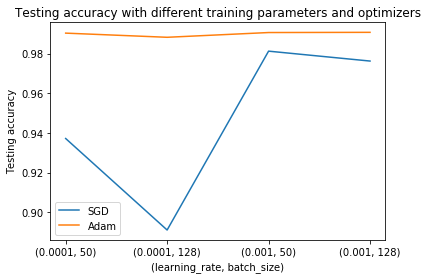

In [17]:
import itertools
import matplotlib.pyplot as plt

testing_accuracies_SGD = [0.937200010, 0.890999973, 0.981299996, 0.976300001]
testing_accuracies_Adam = [0.990400016, 0.988300025, 0.990700006, 0.990800023]
params = list(itertools.product(learning_rates, batch_sizes))
idx = list(range(len(params)))

p1=plt.plot(idx,testing_accuracies_SGD)
p2=plt.plot(idx,testing_accuracies_Adam)
plt.xticks(idx, params)
plt.legend(["SGD", "Adam"])
plt.xlabel("(learning_rate, batch_size)")
plt.ylabel("Testing accuracy")
plt.title("Testing accuracy with different training parameters and optimizers")
plt.show()

We finally reach our 99% of accuracy with several sets of parameters. The one we got the best result with is:
- Learning rate: 0.001
- Batch size: 128
- Optimizer: Adam
with 99.08% of test accuracy.

<b> Question 2.2.2 </b>  What about applying a dropout layer on the Fully conntected layer and then retraining the model with the best Optimizer and parameters(Learning rate and Batch size) obtained in *Question 2.2.1*  ? (probability to keep units=0.75). For this stage ensure that the keep prob is set to 1.0 to evaluate the 
performance of the network including all nodes.

In [11]:
# from tensorflow.contrib.layers import flatten
import time

def LeNet5_Model_Relu_Drop(data):
    data = tf.reshape(data, [-1, 28, 28, 1])
    # Set layer1 weights
    W_layer1 = weight_variable([5, 5, 1, 6])
    b_layer1 = bias_variable([6])
    
    # Set layer2 weights
    W_layer2 = weight_variable([5, 5, 6, 16])
    b_layer2 = bias_variable([16])
    
    # Set layer3 weights
    W_layer3 = weight_variable([400,120])
    b_layer3 = bias_variable([120])
    
    # Set layer4 weights
    W_layer4 = weight_variable([120,84])
    b_layer4 = bias_variable([84])
    
    # Set layer5 weights
    W_layer5 = weight_variable([84,10])
    b_layer5 = bias_variable([10])

    # Construct model
    layer1 = tf.nn.relu(tf.nn.conv2d(data, W_layer1, [1, 1, 1, 1], padding='SAME') + b_layer1)
    pooling1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = tf.nn.relu(tf.nn.conv2d(pooling1, W_layer2, [1, 1, 1, 1], padding='VALID') + b_layer2)
    pooling2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    flattened = tf.contrib.layers.flatten(pooling2)
    keep_prob = 0.75
    layer3 = tf.nn.relu(tf.matmul(flattened, W_layer3) + b_layer3)
    layer3_drop = tf.nn.dropout(layer3, keep_prob)
    layer4 = tf.nn.relu(tf.matmul(layer3_drop, W_layer4) + b_layer4)
    layer4_drop = tf.nn.dropout(layer4, keep_prob)
    
    with tf.name_scope('Model'):
        # Model
        model = tf.nn.softmax(tf.matmul(layer4_drop, W_layer5) + b_layer5) # Softmax
    return model

model_relu_drop = LeNet5_Model_Relu_Drop(x)

# Training parameters 
learning_rate = 0.001
training_epochs = 50
batch_size = 128
display_step = 1
logs_path = 'log_files/'  # useful for tensorboard
saving_path = 'models/'
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(model_relu_drop+1e-9), reduction_indices=1))
with tf.name_scope('Accuracy'):
    # Accuracy
    accuracy = evaluate(model_relu_drop, y)
with tf.name_scope('Adam'):
    # Adam Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", accuracy)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()    

print("***Training with optimal paramiters***")
t0 = time.time()
train(learning_rate, training_epochs, batch_size, cost, optimizer)
print("Time taken: ",time.time()-t0)

***Training with optimal paramiters***
Start Training!
Epoch:  01   =====> Loss= 0.469975067   Accuracy= 0.956900001
Epoch:  02   =====> Loss= 0.124659879   Accuracy= 0.974500000
Epoch:  03   =====> Loss= 0.086438573   Accuracy= 0.975799978
Epoch:  04   =====> Loss= 0.071557593   Accuracy= 0.981700003
Epoch:  05   =====> Loss= 0.059307722   Accuracy= 0.982599974
Epoch:  06   =====> Loss= 0.052442966   Accuracy= 0.985700011
Epoch:  07   =====> Loss= 0.048454356   Accuracy= 0.984399974
Epoch:  08   =====> Loss= 0.040807218   Accuracy= 0.985899985
Epoch:  09   =====> Loss= 0.035818005   Accuracy= 0.987500012
Epoch:  10   =====> Loss= 0.034113269   Accuracy= 0.986500025
Epoch:  11   =====> Loss= 0.032113095   Accuracy= 0.985899985
Epoch:  12   =====> Loss= 0.029398655   Accuracy= 0.986500025
Epoch:  13   =====> Loss= 0.027292354   Accuracy= 0.987699986
Epoch:  14   =====> Loss= 0.027313543   Accuracy= 0.986899972
Epoch:  15   =====> Loss= 0.023507383   Accuracy= 0.988900006
Epoch:  16   ==

We finally reached the 99.11% accuracy that we were seeking thanks to the tuning of the parameters and by introducing training optimizations like relu activation and the dropout on fully connected layers (even though this last optmization didn't help much).